##**Github:** git clone https://github.com/AaronWangDev/cs131.git

In [2]:
%pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [23]:
wine_quality = fetch_ucirepo(id=186)

X = wine_quality.data.features
y = wine_quality.data.targets

In [24]:
comb_df = pd.concat([X,y], axis=1)
comb_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#**Question 1**

In [25]:
comb_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#**Question 2**

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

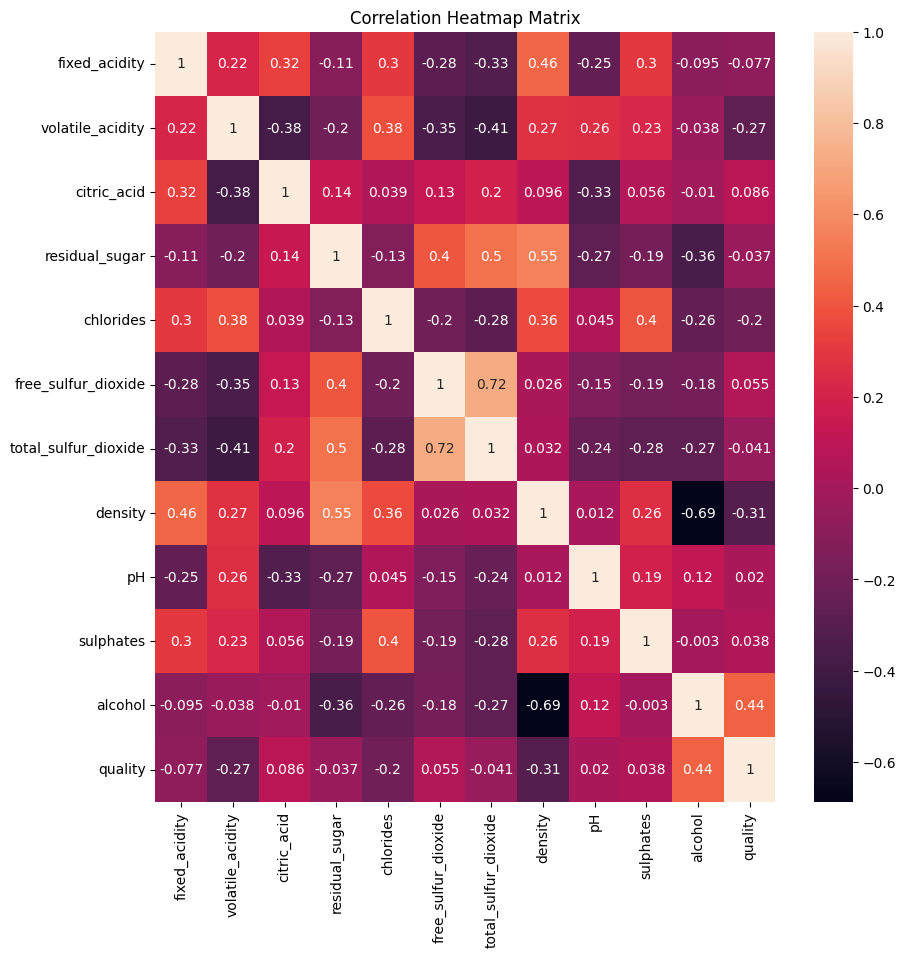

In [69]:
plt.figure(figsize=(10,10))
corr_plot = sns.heatmap(comb_df.corr(), annot=True)
plt.title("Correlation Heatmap Matrix")

#**Question 3**

Text(0.5, 1.0, 'Distribution of Wine Quality')

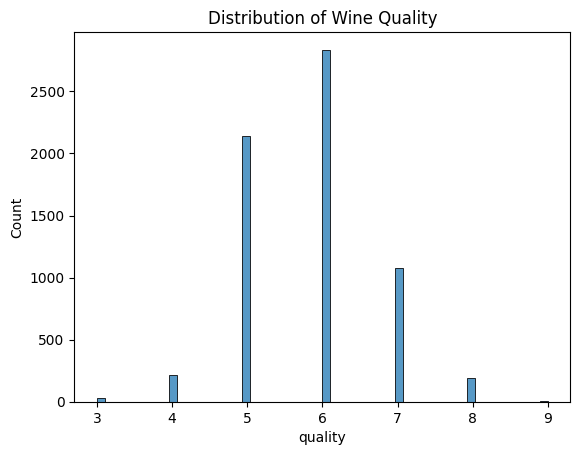

In [70]:
sns.histplot(y, x="quality")
plt.title("Distribution of Wine Quality")

#**Question 4**

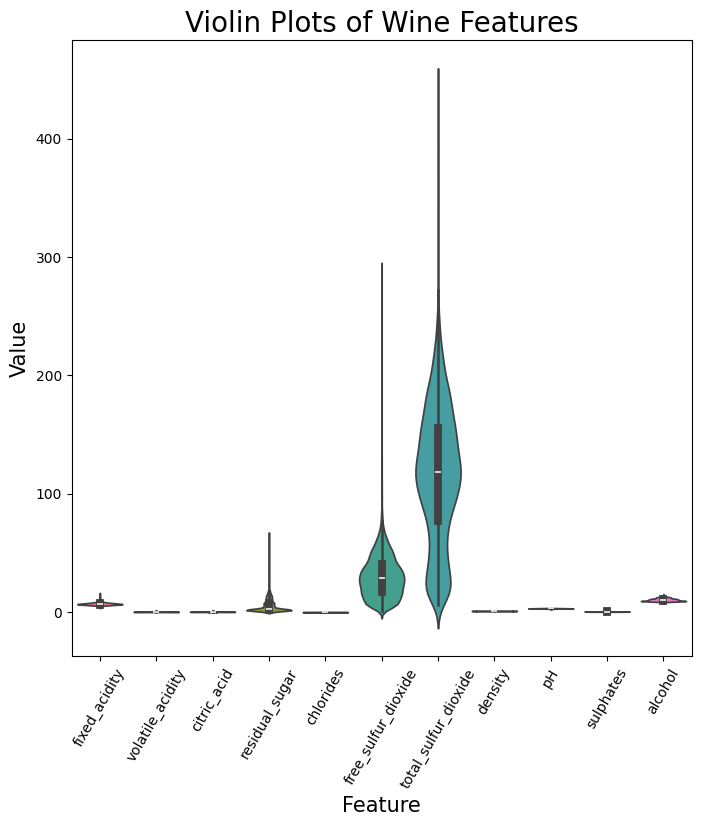

In [83]:
plt.figure(figsize=(8,8))
sns.violinplot(data=X)
plt.title("Violin Plots of Wine Features", size=20)
plt.ylabel("Value", size=15)
plt.xlabel("Feature", size=15)
plt.xticks(rotation=60);

#**Question 5**

In [65]:
model = LinearRegression()
model.fit(X[["alcohol"]], y["quality"])

test_model = model.predict(X[["alcohol"]])

rmse = np.sqrt(mean_squared_error(y, test_model))
r2 = r2_score(y, test_model)

In [67]:
print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

Intercept = 2.405268601553047
Coefficient = 0.32531203805396114
RMSE = 0.7822620146034583
R^2 = 0.19741894722167097


#**Question 6**

In [76]:
model = LinearRegression()
model.fit(X[["volatile_acidity", "alcohol", "density"]], y["quality"])

test_model = model.predict(X[["volatile_acidity", "alcohol", "density"]])

rmse = np.sqrt(mean_squared_error(y, test_model))
r2 = r2_score(y, test_model)

In [77]:
print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

Intercept = -35.11410542500002
Coefficient = -1.4909159480450567
RMSE = 0.7474262269606383
R^2 = 0.26730861585121124
